In [38]:
import pandas as pd
import pickle
import shap
import numpy as np

### Decision Tree

#### all data

In [81]:
with open('../Machine_Learning/Models/Decision Tree_model_all.pkl', 'rb') as f:
    dtree_all = pickle.load(f)
X_test_all = pd.read_csv('data/X_test_shuffled_all.csv')
y_test_all = pd.read_csv('data/y_test_shuffled_all.csv')

In [82]:
# Fits the explainer
background = X_test_all
# background = X_test
explainer = shap.Explainer(model=dtree_all.predict, masker=background, feature_names=X_test_all.columns, seed=0)
# Calculates the SHAP values - It takes some time
shap_values = explainer(background)  # , max_evals=1000

In [83]:
shap_values_dtree_all = pd.DataFrame(data=shap_values.values, columns=X_test_all.columns)
# shap_values_dtree_all.mul(1000)
shap_values_dtree_all

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.02,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.01,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.01,0.0,0.0,0.0,0.0,0.0,0.0
278,0.0,0.0,-0.0025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0
279,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.01,0.0,0.0,0.0,0.0,0.0,0.0
280,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.01,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
symptom_cols = []

for col in shap_values_dtree_all.columns:
    if 'symptom_embedding_' in col:
        symptom_cols.append(col)

vaccine_cols = []

for col in shap_values_dtree_all.columns:
    if 'manufacturer_' in col:
        vaccine_cols.append(col)
age_cols = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109',
            '110-119']
numdays_cols = ['NUMDAYS_0-1', 'NUMDAYS_2-3', 'NUMDAYS_4-5', 'NUMDAYS_6-7', 'NUMDAYS_8-9', 'NUMDAYS_10-11',
                'NUMDAYS_12-13', 'NUMDAYS_14+']
reaction_cols = ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']
de_cols = ['DE', 'De', 'dE', 'de']
serious_cols = ['SERIOUS Y', 'SERIOUS N']
sex_cols = ['SEX_M', 'SEX_F', 'SEX_U']

In [85]:
shap_values_dtree_all_fl = pd.DataFrame()

shap_values_dtree_all_fl['vaccine'] = shap_values_dtree_all[vaccine_cols].sum(axis=1)
shap_values_dtree_all_fl['symptom'] = shap_values_dtree_all[symptom_cols].sum(axis=1)
shap_values_dtree_all_fl['age_group'] = shap_values_dtree_all[age_cols].sum(axis=1)
shap_values_dtree_all_fl['sex'] = shap_values_dtree_all[sex_cols].sum(axis=1)
shap_values_dtree_all_fl['serious'] = shap_values_dtree_all[serious_cols].sum(axis=1)
shap_values_dtree_all_fl['seriousness'] = shap_values_dtree_all[reaction_cols].sum(axis=1)
shap_values_dtree_all_fl['numdays'] = shap_values_dtree_all[numdays_cols].sum(axis=1)
shap_values_dtree_all_fl['ct'] = shap_values_dtree_all[de_cols].sum(axis=1)

shap_values_dtree_all_fl

,vaccine,symptom,age_group,sex,serious,seriousness,numdays,ct
0,0.0,-0.0250,0.0000,0.0,0.0,0.0,0.0,-0.065
1,0.0,-0.0400,0.0000,0.0,0.0,0.0,0.0,-0.050
2,0.0,0.0050,0.0000,0.0,0.0,0.0,0.0,-0.095
3,0.0,-0.0600,0.0000,0.0,0.0,0.0,0.0,-0.030
4,0.0,0.3950,0.0000,0.0,0.0,0.0,0.0,0.515
...,...,...,...,...,...,...,...,...
277,0.0,-0.0250,0.0000,0.0,0.0,0.0,0.0,-0.065
278,0.0,-0.0375,-0.0025,0.0,0.0,0.0,0.0,-0.050
279,0.0,-0.0750,0.0000,0.0,0.0,0.0,0.0,-0.015
280,0.0,-0.0800,0.0000,0.0,0.0,0.0,0.0,-0.010


In [86]:
shap_values_dtree_all_fl.abs().mean(axis=0).mul(100)

vaccine        0.000000
symptom        9.484929
age_group      0.870567
sex            0.000000
serious        0.000000
seriousness    0.000000
numdays        0.014184
ct             8.862589
dtype: float64

#### 5% true labels

In [87]:
with open('../Machine_Learning/Models/Decision Tree_model_5.pkl', 'rb') as f:
    dtree_5 = pickle.load(f)
X_test_5 = pd.read_csv('data/X_test_unique_5_shuffled.csv')
y_test_5 = pd.read_csv('data/y_test_unique_5_shuffled.csv')

In [88]:
'''from sklearn import tree
tree.plot_tree(dtree_5)'''

'from sklearn import tree\ntree.plot_tree(dtree_5)'

In [89]:
# Fits the explainer
background = X_test_5
# background = X_test
explainer = shap.Explainer(model=dtree_5.predict, masker=background, feature_names=X_test_5.columns, seed=0)  # , algorithm="tree"
# Calculates the SHAP values - It takes some time
shap_values = explainer(background)  # , max_evals=1000

PermutationExplainer explainer: 561it [00:16, 13.25it/s]                         


In [90]:
shap_values_dtree_5 = pd.DataFrame(data=shap_values.values, columns=X_test_5.columns)
# shap_values_dtree_5.mul(1000)
shap_values_dtree_5

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
symptom_cols = []

for col in shap_values_dtree_5.columns:
    if 'symptom_embedding_' in col:
        symptom_cols.append(col)

vaccine_cols = []

for col in shap_values_dtree_5.columns:
    if 'manufacturer_' in col:
        vaccine_cols.append(col)
age_cols = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109',
            '110-119']
numdays_cols = ['NUMDAYS_0-1', 'NUMDAYS_2-3', 'NUMDAYS_4-5', 'NUMDAYS_6-7', 'NUMDAYS_8-9', 'NUMDAYS_10-11',
                'NUMDAYS_12-13', 'NUMDAYS_14+']
reaction_cols = ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']
de_cols = ['DE', 'De', 'dE', 'de']
serious_cols = ['SERIOUS Y', 'SERIOUS N']
sex_cols = ['SEX_M', 'SEX_F', 'SEX_U']

In [92]:
shap_values_dtree_5_fl = pd.DataFrame()

shap_values_dtree_5_fl['vaccine'] = shap_values_dtree_5[vaccine_cols].sum(axis=1)
shap_values_dtree_5_fl['symptom'] = shap_values_dtree_5[symptom_cols].sum(axis=1)
shap_values_dtree_5_fl['age_group'] = shap_values_dtree_5[age_cols].sum(axis=1)
shap_values_dtree_5_fl['sex'] = shap_values_dtree_5[sex_cols].sum(axis=1)
shap_values_dtree_5_fl['serious'] = shap_values_dtree_5[serious_cols].sum(axis=1)
shap_values_dtree_5_fl['seriousness'] = shap_values_dtree_5[reaction_cols].sum(axis=1)
shap_values_dtree_5_fl['numdays'] = shap_values_dtree_5[numdays_cols].sum(axis=1)
shap_values_dtree_5_fl['ct'] = shap_values_dtree_5[de_cols].sum(axis=1)

shap_values_dtree_5_fl.head()

,vaccine,symptom,age_group,sex,serious,seriousness,numdays,ct
0,0.0,0.005,0.0,0.0,0.0,0.0,0.0,-0.035
1,0.0,0.130,0.0,0.0,0.0,0.0,0.0,0.840
2,0.0,0.005,0.0,0.0,0.0,0.0,0.0,-0.035
3,0.0,-0.015,0.0,0.0,0.0,0.0,0.0,-0.015
4,0.0,0.005,0.0,0.0,0.0,0.0,0.0,-0.035


In [93]:
shap_values_dtree_5_fl.abs().mean(axis=0).mul(100)

vaccine        0.000000
symptom        2.266964
age_group      0.000000
sex            0.000000
serious        0.000000
seriousness    0.000000
numdays        0.000000
ct             8.186607
dtype: float64

In [69]:
shap.initjs()

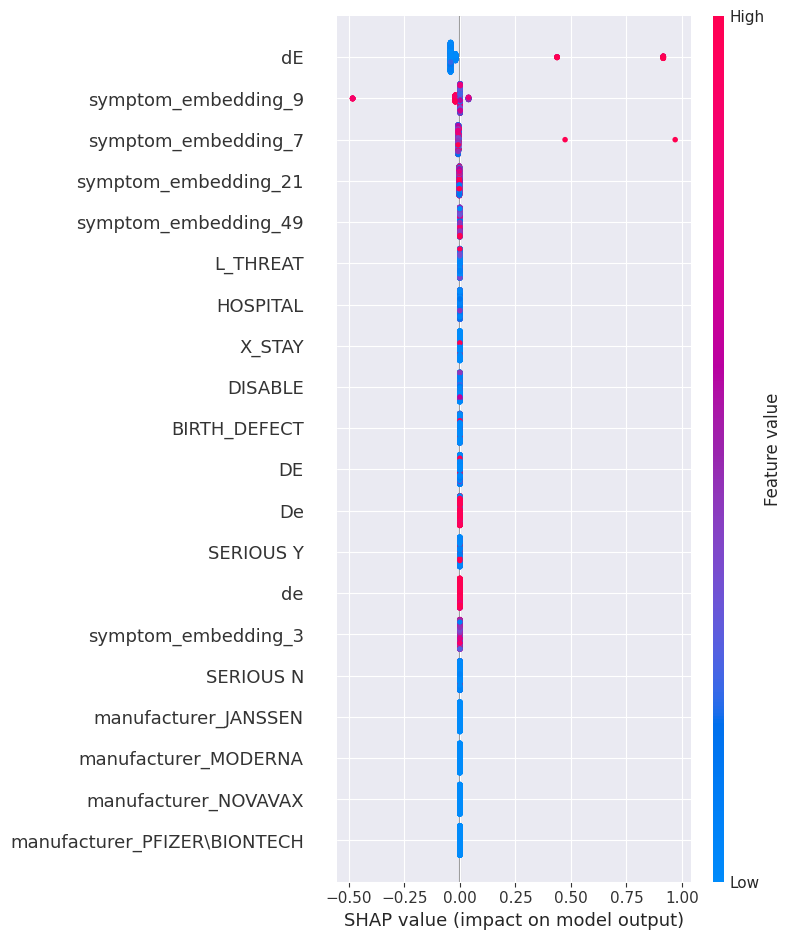

In [76]:
shap.summary_plot(shap_values[1], X_test_5)

In [89]:
shap_values[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### 10% true labels

In [94]:
with open('../Machine_Learning/Models/Decision Tree_model_10.pkl', 'rb') as f:
    dtree_10 = pickle.load(f)
X_train_10 = pd.read_csv('data/X_train_unique_10_shuffled.csv')
X_test_10 = pd.read_csv('data/X_test_unique_10_shuffled.csv')

In [95]:
tree.plot_tree(dtree_10)

NameError: name 'tree' is not defined

In [96]:

# Fits the explainer
background = X_test_10
# background = X_test
explainer = shap.Explainer(model=dtree_10.predict, masker=background, feature_names=X_test_10.columns, seed=0)
# Calculates the SHAP values - It takes some time
shap_values = explainer(background)  # , max_evals=1000

In [97]:
shap_values_dtree_10 = pd.DataFrame(data=shap_values.values, columns=X_test_10.columns)
# shap_values_dtree_10.mul(1000)
shap_values_dtree_10.head()

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
symptom_cols = []

for col in shap_values_dtree_10.columns:
    if 'symptom_embedding_' in col:
        symptom_cols.append(col)
        
vaccine_cols = []

for col in shap_values_dtree_10.columns:
    if 'manufacturer_' in col:
        vaccine_cols.append(col)

In [99]:
age_cols = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109',
            '110-119']
numdays_cols = ['NUMDAYS_0-1', 'NUMDAYS_2-3', 'NUMDAYS_4-5', 'NUMDAYS_6-7', 'NUMDAYS_8-9', 'NUMDAYS_10-11',
                'NUMDAYS_12-13', 'NUMDAYS_14+']
reaction_cols = ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']
de_cols = ['DE', 'De', 'dE', 'de']
serious_cols = ['SERIOUS Y', 'SERIOUS N']
sex_cols = ['SEX_M', 'SEX_F', 'SEX_U']

In [100]:
shap_values_dtree_10_fl = pd.DataFrame()

shap_values_dtree_10_fl['vaccine'] = shap_values_dtree_10[vaccine_cols].sum(axis=1)
shap_values_dtree_10_fl['symptom'] = shap_values_dtree_10[symptom_cols].sum(axis=1)
shap_values_dtree_10_fl['age_group'] = shap_values_dtree_10[age_cols].sum(axis=1)
shap_values_dtree_10_fl['sex'] = shap_values_dtree_10[sex_cols].sum(axis=1)
shap_values_dtree_10_fl['serious'] = shap_values_dtree_10[serious_cols].sum(axis=1)
shap_values_dtree_10_fl['seriousness'] = shap_values_dtree_10[reaction_cols].sum(axis=1)
shap_values_dtree_10_fl['numdays'] = shap_values_dtree_10[numdays_cols].sum(axis=1)
shap_values_dtree_10_fl['ct'] = shap_values_dtree_10[de_cols].sum(axis=1)

shap_values_dtree_10_fl.head()

,vaccine,symptom,age_group,sex,serious,seriousness,numdays,ct
0,0.0,-0.005,0.0,0.0,0.0,0.0,0.0,0.905
1,0.0,-0.005,0.0,0.0,0.0,0.0,0.0,0.905
2,0.0,-0.010,0.0,0.0,0.0,0.0,0.0,-0.090
3,0.0,-0.010,0.0,0.0,0.0,0.0,0.0,-0.090
4,0.0,-0.010,0.0,0.0,0.0,0.0,0.0,-0.090


In [101]:
shap_values_dtree_10_fl.abs().mean(axis=0).mul(100)

vaccine         0.000000
symptom         2.285714
age_group       0.000000
sex             0.000000
serious         0.000000
seriousness     0.000000
numdays         0.000000
ct             17.085714
dtype: float64

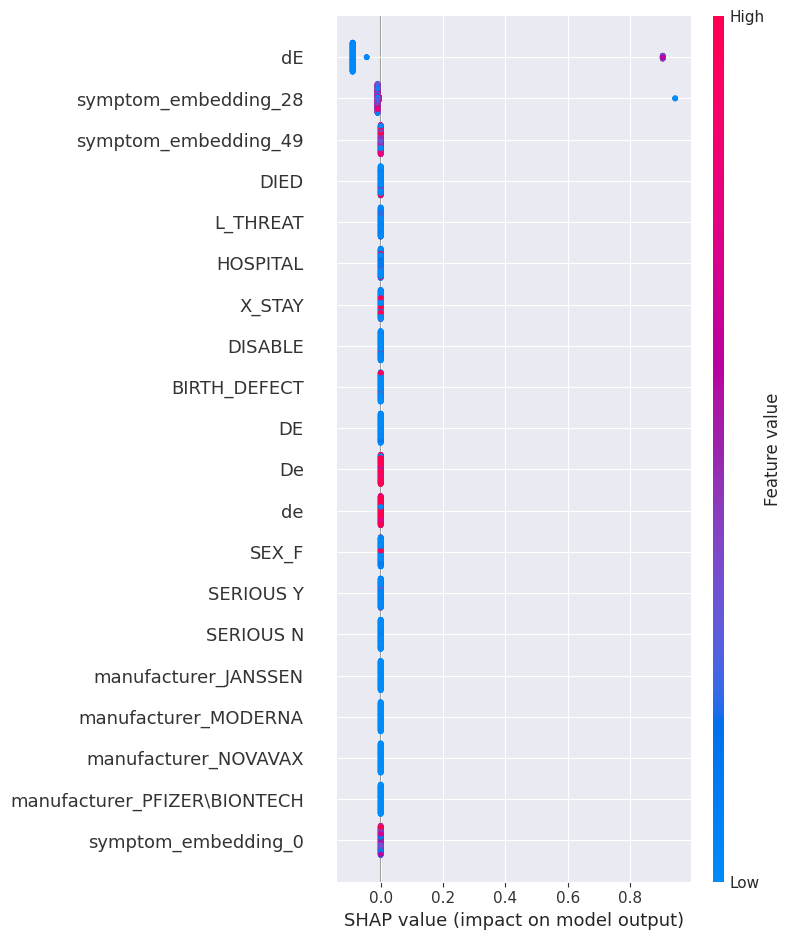

In [265]:
shap.summary_plot(shap_values, X_test_10)

In [3]:
shap_values[1]

NameError: name 'shap_values' is not defined

In [20]:
# Fits the explainer
background = X_test_10
# background = X_test
explainer = shap.Explainer(model=dtree_10.predict, masker=background, feature_names=X_test_10.columns)
# Calculates the SHAP values - It takes some time
shap_values = explainer(background)  # , max_evals=1000

In [23]:
shap_values_dt_10 = pd.DataFrame(data=shap_values.values, columns=X_test_10.columns)
shap_values_dt_10.mul(1000)
shap_values_dt_10.max()

0-9                     0.0
10-19                   0.0
20-29                   0.0
30-39                   0.0
40-49                   0.0
                       ... 
symptom_embedding_45    0.0
symptom_embedding_46    0.0
symptom_embedding_47    0.0
symptom_embedding_48    0.0
symptom_embedding_49    0.0
Length: 89, dtype: float64

In [15]:
age_cols = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119']
numdays_cols = ['NUMDAYS_0-1', 'NUMDAYS_2-3', 'NUMDAYS_4-5', 'NUMDAYS_6-7', 'NUMDAYS_8-9', 'NUMDAYS_10-11',
               'NUMDAYS_12-13', 'NUMDAYS_14+']
reaction_cols = ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']
de_cols = ['DE', 'De', 'dE', 'de']
serious_cols = ['SERIOUS Y', 'SERIOUS N']
sex_cols = ['SEX_M', 'SEX_F', 'SEX_U']

In [19]:
shap_values_dt_10_fl = pd.DataFrame()

shap_values_dt_10_fl['age_group'] = shap_values_dt_10[age_cols].sum(axis=1).mul(1000)
shap_values_dt_10_fl.max()

age_group    0.0
dtype: float64

### Random Forest

#### all data

In [102]:
with open('../Machine_Learning/Models/Random Forest_model_all.pkl', 'rb') as f:
    randomforest_all = pickle.load(f)
X_test_all = pd.read_csv('data/X_test_shuffled_all.csv')
y_test_all = pd.read_csv('data/y_test_shuffled_all.csv')

In [103]:
# Fits the explainer
background = X_test_all
# background = X_test
explainer = shap.Explainer(model=randomforest_all.predict, masker=background, feature_names=X_test_all.columns, seed=0)
# Calculates the SHAP values - It takes some time
shap_values = explainer(background)  # , max_evals=1000

PermutationExplainer explainer: 283it [01:01,  3.86it/s]                         


In [104]:
shap_values_rf_all = pd.DataFrame(data=shap_values.values, columns=X_test_all.columns)
# shap_values_rf_all.mul(1000)
shap_values_rf_all

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0.0,0.0000,0.0000,0.0000,-0.0025,-0.0025,0.0000,0.0,0.0,0.0,...,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0075,-0.0025,0.0000
1,0.0,0.0000,0.0000,0.0000,-0.0025,-0.0025,0.0000,0.0,0.0,0.0,...,0.0000,0.0,-0.0050,-0.0025,0.0000,-0.0125,0.0000,0.0000,0.0000,0.0000
2,0.0,-0.0025,0.0000,-0.0025,0.0000,0.0000,0.0000,0.0,0.0,0.0,...,-0.0025,0.0,-0.0100,0.0000,-0.0025,0.0000,0.0000,0.0000,0.0000,-0.0025
3,0.0,0.0000,0.0000,-0.0050,0.0000,0.0000,0.0000,0.0,0.0,0.0,...,-0.0050,0.0,0.0000,-0.0100,0.0000,0.0000,0.0000,0.0000,-0.0025,-0.0025
4,0.0,0.0000,0.0000,0.0000,-0.0025,0.0000,0.0000,0.0,0.0,0.0,...,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0.0,0.0000,-0.0025,0.0000,-0.0050,0.0000,0.0000,0.0,0.0,0.0,...,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0025,0.0000
278,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0025,0.0,0.0,0.0,...,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0025
279,0.0,0.0000,0.0000,0.0000,0.0000,-0.0025,0.0000,0.0,0.0,0.0,...,0.0000,0.0,-0.0125,-0.0025,0.0000,0.0000,-0.0025,0.0000,0.0000,-0.0125
280,0.0,-0.0025,-0.0050,-0.0050,0.0000,0.0000,0.0000,0.0,0.0,0.0,...,0.0000,0.0,0.0000,-0.0025,0.0000,-0.0050,0.0000,0.0000,0.0000,-0.0075


In [105]:
symptom_cols = []

for col in shap_values_rf_all.columns:
    if 'symptom_embedding_' in col:
        symptom_cols.append(col)

vaccine_cols = []

for col in shap_values_rf_all.columns:
    if 'manufacturer_' in col:
        vaccine_cols.append(col)
age_cols = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109',
            '110-119']
numdays_cols = ['NUMDAYS_0-1', 'NUMDAYS_2-3', 'NUMDAYS_4-5', 'NUMDAYS_6-7', 'NUMDAYS_8-9', 'NUMDAYS_10-11',
                'NUMDAYS_12-13', 'NUMDAYS_14+']
reaction_cols = ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']
de_cols = ['DE', 'De', 'dE', 'de']
serious_cols = ['SERIOUS Y', 'SERIOUS N']
sex_cols = ['SEX_M', 'SEX_F', 'SEX_U']

In [106]:
shap_values_rf_all_fl = pd.DataFrame()

shap_values_rf_all_fl['vaccine'] = shap_values_rf_all[vaccine_cols].sum(axis=1)
shap_values_rf_all_fl['symptom'] = shap_values_rf_all[symptom_cols].sum(axis=1)
shap_values_rf_all_fl['age_group'] = shap_values_rf_all[age_cols].sum(axis=1)
shap_values_rf_all_fl['sex'] = shap_values_rf_all[sex_cols].sum(axis=1)
shap_values_rf_all_fl['serious'] = shap_values_rf_all[serious_cols].sum(axis=1)
shap_values_rf_all_fl['seriousness'] = shap_values_rf_all[reaction_cols].sum(axis=1)
shap_values_rf_all_fl['numdays'] = shap_values_rf_all[numdays_cols].sum(axis=1)
shap_values_rf_all_fl['ct'] = shap_values_rf_all[de_cols].sum(axis=1)

shap_values_rf_all_fl

,vaccine,symptom,age_group,sex,serious,seriousness,numdays,ct
0,0.0000,-0.0725,-0.0050,0.0000,0.0000,0.000000e+00,0.0000,-0.0125
1,0.0000,-0.0850,-0.0050,0.0000,0.0025,0.000000e+00,0.0000,-0.0025
2,0.0000,-0.0750,-0.0050,-0.0025,0.0000,0.000000e+00,-0.0050,-0.0025
3,0.0000,-0.0700,-0.0050,0.0000,0.0000,0.000000e+00,-0.0050,-0.0100
4,0.0000,0.4600,-0.0025,0.0000,0.0000,0.000000e+00,-0.0025,0.4550
...,...,...,...,...,...,...,...,...
277,-0.0050,-0.0725,-0.0075,0.0000,0.0000,0.000000e+00,-0.0050,0.0000
278,0.0000,-0.0675,0.0025,-0.0075,0.0000,-4.336809e-19,-0.0025,-0.0150
279,-0.0025,-0.0825,-0.0025,0.0000,0.0000,0.000000e+00,-0.0025,0.0000
280,0.0000,-0.0600,-0.0125,0.0000,0.0000,-2.500000e-03,-0.0125,-0.0025


In [107]:
shap_values_rf_all_fl.abs().mean(axis=0).mul(100)

vaccine         0.060284
symptom        13.623227
age_group       1.709220
sex             0.519504
serious         0.171099
seriousness     0.141844
numdays         0.630319
ct              2.085993
dtype: float64

#### 5% true labels

In [108]:
with open('../Machine_Learning/Models/Random Forest_model_5.pkl', 'rb') as f:
    randomforest_5 = pickle.load(f)
X_train_5 = pd.read_csv('data/X_train_unique_5_shuffled.csv')
X_test_5 = pd.read_csv('data/X_test_unique_5_shuffled.csv')

In [109]:
tree.plot_tree(randomforest_5.estimators_[0],
               filled = True)

NameError: name 'tree' is not defined

In [110]:
# Fits the explainer
background = X_test_5
# background = X_test
explainer = shap.Explainer(model=randomforest_5.predict, masker=background, feature_names=X_test_5.columns, seed=0)
# Calculates the SHAP values - It takes some time
shap_values = explainer(background)  # , max_evals=1000

PermutationExplainer explainer: 561it [01:51,  4.60it/s]                         


In [111]:
shap_values_rf_5 = pd.DataFrame(data=shap_values.values, columns=X_test_5.columns)
# shap_values_rf_5.mul(1000)
shap_values_rf_5

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,-0.0025,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0
1,0.0,0.0,0.0025,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,-0.0025,0.0,0.0,0.0000,0.0,0.0,0.0
2,0.0,0.0,-0.0025,0.0000,0.0000,0.0,0.0,-0.0025,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0
3,0.0,0.0,0.0000,-0.0025,0.0000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0
4,0.0,0.0,0.0000,-0.0025,0.0000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.0,0.0,0.0000,0.0000,-0.0025,0.0,0.0,-0.0025,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0025,0.0,0.0,0.0
556,0.0,0.0,-0.0050,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0025,0.0,0.0,0.0000,0.0,0.0,0.0
557,0.0,0.0,0.0000,0.0000,-0.0025,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0
558,0.0,0.0,0.0000,-0.0025,0.0000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0025,0.0,0.0,0.0


In [112]:
symptom_cols = []

for col in shap_values_rf_5.columns:
    if 'symptom_embedding_' in col:
        symptom_cols.append(col)
        
vaccine_cols = []

for col in shap_values_rf_5.columns:
    if 'manufacturer_' in col:
        vaccine_cols.append(col)

In [113]:
age_cols = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119']
numdays_cols = ['NUMDAYS_0-1', 'NUMDAYS_2-3', 'NUMDAYS_4-5', 'NUMDAYS_6-7', 'NUMDAYS_8-9', 'NUMDAYS_10-11',
               'NUMDAYS_12-13', 'NUMDAYS_14+']
reaction_cols = ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']
de_cols = ['DE', 'De', 'dE', 'de']
serious_cols = ['SERIOUS Y', 'SERIOUS N']
sex_cols = ['SEX_M', 'SEX_F', 'SEX_U']

In [114]:
shap_values_rf_5_fl = pd.DataFrame()

shap_values_rf_5_fl['vaccine'] = shap_values_rf_5[vaccine_cols].sum(axis=1)
shap_values_rf_5_fl['symptom'] = shap_values_rf_5[symptom_cols].sum(axis=1)
shap_values_rf_5_fl['age_group'] = shap_values_rf_5[age_cols].sum(axis=1)
shap_values_rf_5_fl['sex'] = shap_values_rf_5[sex_cols].sum(axis=1)
shap_values_rf_5_fl['serious'] = shap_values_rf_5[serious_cols].sum(axis=1)
shap_values_rf_5_fl['seriousness'] = shap_values_rf_5[reaction_cols].sum(axis=1)
shap_values_rf_5_fl['numdays'] = shap_values_rf_5[numdays_cols].sum(axis=1)
shap_values_rf_5_fl['ct'] = shap_values_rf_5[de_cols].sum(axis=1)

shap_values_rf_5_fl.head()

,vaccine,symptom,age_group,sex,serious,seriousness,numdays,ct
0,0.0,0.0050,-0.0025,0.0,0.0,0.0000,-0.0025,-0.0300
1,0.0,0.0325,0.0025,0.0,0.0,0.0000,0.0000,0.9350
2,0.0,0.0000,-0.0050,0.0,0.0,0.0025,0.0000,-0.0275
3,0.0,0.0025,-0.0025,0.0,0.0,0.0000,0.0000,-0.0300
4,0.0,0.0075,-0.0025,0.0,0.0,0.0000,-0.0025,-0.0325


In [115]:
shap_values_rf_5_fl.abs().mean(axis=0).mul(100)

vaccine        0.000000
symptom        1.008036
age_group      0.406250
sex            0.085268
serious        0.115179
seriousness    0.010268
numdays        0.151786
ct             8.620536
dtype: float64

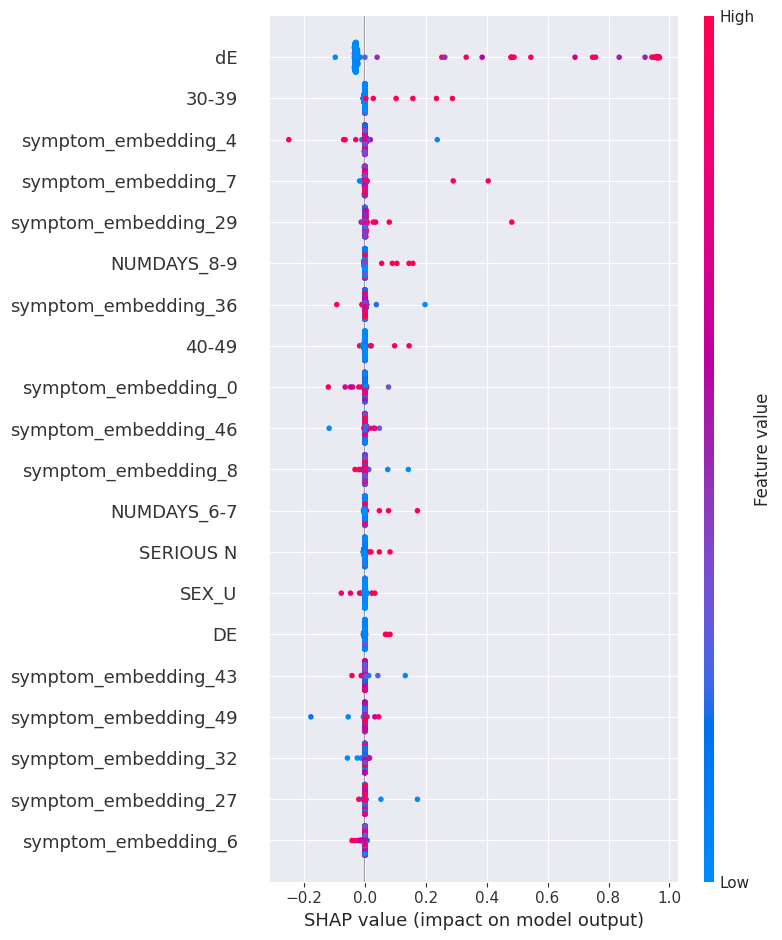

In [176]:
shap.summary_plot(shap_values, X_test_5)

#### 10% true labels

In [116]:
with open('../Machine_Learning/Models/Random Forest_model_10.pkl', 'rb') as f:
    randomforest_10 = pickle.load(f)
X_train_10 = pd.read_csv('data/X_train_unique_10_shuffled.csv')
X_test_10 = pd.read_csv('data/X_test_unique_10_shuffled.csv')

In [117]:
# Fits the explainer
background = X_test_10
# background = X_test
explainer = shap.Explainer(model=randomforest_10.predict, masker=background, feature_names=X_test_10.columns, seed=0)
# Calculates the SHAP values - It takes some time
shap_values = explainer(background)  # , max_evals=1000

PermutationExplainer explainer: 281it [00:55,  4.15it/s]                         


In [118]:
shap_values_rf_10 = pd.DataFrame(data=shap_values.values, columns=X_test_10.columns)
# shap_values_rf_10.mul(1000)
shap_values_rf_10.head()

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0.0,0.0,0.0200,-0.0025,0.000,0.0050,0.0000,0.0000,0.0,0.0000,...,0.005,-0.0100,0.03,0.0000,0.0,0.000,0.0,0.0000,0.0000,0.0000
1,0.0,0.0,0.1200,0.0650,0.005,0.0250,0.0025,0.0075,0.0,0.0075,...,0.005,0.0050,0.00,0.0075,0.0,0.005,0.0,-0.0025,0.0000,-0.0025
2,0.0,0.0,-0.0025,-0.0025,-0.005,-0.0075,0.0000,-0.0025,0.0,0.0000,...,0.000,0.0050,0.00,0.0000,0.0,0.000,0.0,0.0000,0.0025,0.0000
3,0.0,0.0,-0.0050,-0.0100,0.000,-0.0025,0.0000,-0.0025,0.0,0.0000,...,0.000,0.0000,0.00,0.0000,0.0,0.000,0.0,0.0000,0.0000,0.0000
4,0.0,0.0,-0.0025,-0.0100,0.000,0.0000,-0.0050,0.0000,0.0,0.0000,...,0.000,0.0025,0.00,0.0000,0.0,0.000,0.0,0.0000,0.0000,0.0000


In [119]:
symptom_cols = []

for col in shap_values_rf_10.columns:
    if 'symptom_embedding_' in col:
        symptom_cols.append(col)
        
vaccine_cols = []

for col in shap_values_rf_10.columns:
    if 'manufacturer_' in col:
        vaccine_cols.append(col)

In [120]:
age_cols = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109',
            '110-119']
numdays_cols = ['NUMDAYS_0-1', 'NUMDAYS_2-3', 'NUMDAYS_4-5', 'NUMDAYS_6-7', 'NUMDAYS_8-9', 'NUMDAYS_10-11',
                'NUMDAYS_12-13', 'NUMDAYS_14+']
reaction_cols = ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']
de_cols = ['DE', 'De', 'dE', 'de']
serious_cols = ['SERIOUS Y', 'SERIOUS N']
sex_cols = ['SEX_M', 'SEX_F', 'SEX_U']

In [121]:
shap_values_rf_10_fl = pd.DataFrame()

shap_values_rf_10_fl['vaccine'] = shap_values_rf_10[vaccine_cols].sum(axis=1)
shap_values_rf_10_fl['symptom'] = shap_values_rf_10[symptom_cols].sum(axis=1)
shap_values_rf_10_fl['age_group'] = shap_values_rf_10[age_cols].sum(axis=1)
shap_values_rf_10_fl['sex'] = shap_values_rf_10[sex_cols].sum(axis=1)
shap_values_rf_10_fl['serious'] = shap_values_rf_10[serious_cols].sum(axis=1)
shap_values_rf_10_fl['seriousness'] = shap_values_rf_10[reaction_cols].sum(axis=1)
shap_values_rf_10_fl['numdays'] = shap_values_rf_10[numdays_cols].sum(axis=1)
shap_values_rf_10_fl['ct'] = shap_values_rf_10[de_cols].sum(axis=1)

shap_values_rf_10_fl.head()

,vaccine,symptom,age_group,sex,serious,seriousness,numdays,ct
0,0.0,0.0025,0.0225,-0.0025,0.0050,0.0025,0.0025,0.8875
1,0.0,0.0800,0.2325,0.0025,0.0075,0.0175,0.1025,0.4775
2,0.0,0.0050,-0.0200,0.0000,0.0025,0.0000,-0.0050,-0.0625
3,0.0,0.0100,-0.0200,0.0000,-0.0025,0.0000,-0.0100,-0.0575
4,0.0,0.0050,-0.0175,0.0025,0.0000,-0.0025,-0.0075,-0.0600


In [122]:
shap_values_rf_10_fl.abs().mean(axis=0).mul(100)

vaccine         0.000000
symptom         1.585714
age_group       3.087500
sex             0.203571
serious         0.219643
seriousness     0.174107
numdays         1.326786
ct             11.165179
dtype: float64

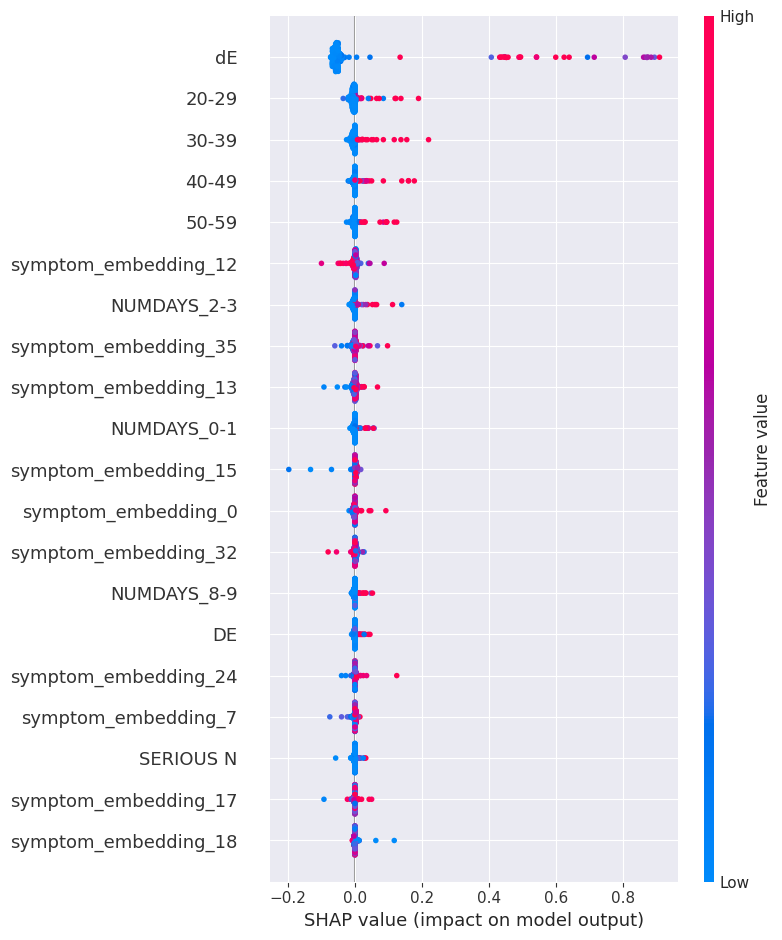

In [123]:
shap.summary_plot(shap_values, X_test_10)

### Logistic Regression

#### all data

In [124]:
with open('../Machine_Learning/Models/Logistic Regression_model_all.pkl', 'rb') as f:
    logreg_all = pickle.load(f)
X_test_all = pd.read_csv('data/X_test_shuffled_all.csv')
y_test_all = pd.read_csv('data/y_test_shuffled_all.csv')


In [125]:
X_test_all

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0,0,2,3,2,1,0,0,1,0,...,0.000282,-0.007138,-0.012482,0.000544,0.002612,-0.053464,0.040051,0.015480,-0.032037,-0.022776
1,0,2,5,7,9,14,6,2,0,0,...,-0.003363,0.042923,0.031551,0.047521,0.032215,-0.036324,-0.049080,-0.022196,-0.026631,0.033232
2,0,2,1,2,1,2,2,1,1,0,...,0.002593,-0.025400,-0.025620,0.032555,-0.039107,0.001893,0.043292,-0.002072,-0.004137,0.011783
3,0,2,10,29,35,59,30,39,10,0,...,-0.023334,0.066150,0.061221,0.019564,-0.043099,0.020107,0.062162,-0.062903,-0.037843,0.027586
4,0,0,5,9,4,2,2,3,0,0,...,0.055290,-0.080509,-0.037192,0.043397,0.084278,0.049207,-0.011717,0.015272,0.084912,0.020752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0,0,1,2,2,2,2,3,0,0,...,-0.042381,0.035887,-0.019411,-0.020026,-0.030221,-0.000452,0.023068,-0.007028,-0.054097,0.006972
278,0,0,1,6,1,1,1,1,0,1,...,-0.059109,-0.005580,-0.019685,0.037470,0.017619,0.006566,0.048463,-0.020519,-0.039030,0.021835
279,0,0,9,23,16,13,12,7,2,0,...,0.044730,-0.033509,-0.024469,-0.021468,0.025084,0.019286,-0.017879,0.011543,-0.012491,-0.011701
280,0,0,0,0,0,1,0,2,1,0,...,-0.042675,0.033379,0.053545,-0.057624,-0.090926,-0.067562,0.006043,-0.010099,-0.080086,-0.053725


In [126]:
# Fits the explainer
background = X_test_all
# background = X_test
explainer = shap.Explainer(model=logreg_all.predict, masker=background, feature_names=X_test_all.columns, seed=0)
# Calculates the SHAP values - It takes some time
shap_values = explainer(background)  # , max_evals=1000

PermutationExplainer explainer: 283it [00:10,  2.00it/s]                         


In [127]:
shap_values_logreg_all = pd.DataFrame(data=shap_values.values, columns=X_test_all.columns)
# shap_values_logreg_all.mul(1000)
shap_values_logreg_all

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0.0,0.0000,-0.0300,-0.0175,-0.0075,-0.0050,-0.0025,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-0.0025,-0.0100,-0.0200,-0.0100,-0.0025,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0000,-0.0150,0.0000,0.0000,-0.0025,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0000,-0.0150,-0.0150,-0.0050,-0.0050,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0000,-0.0100,-0.0100,-0.0050,0.0000,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0.0,0.0000,-0.0050,-0.0200,-0.0075,-0.0050,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278,0.0,0.0000,-0.0100,-0.0025,-0.0025,0.0000,-0.0025,0.0025,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279,0.0,0.0000,-0.0225,-0.0200,0.0000,-0.0050,-0.0025,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
280,0.0,0.0000,-0.0200,-0.0125,-0.0100,-0.0050,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
symptom_cols = []

for col in shap_values_logreg_all.columns:
    if 'symptom_embedding_' in col:
        symptom_cols.append(col)

vaccine_cols = []

for col in shap_values_logreg_all.columns:
    if 'manufacturer_' in col:
        vaccine_cols.append(col)
age_cols = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109',
            '110-119']
numdays_cols = ['NUMDAYS_0-1', 'NUMDAYS_2-3', 'NUMDAYS_4-5', 'NUMDAYS_6-7', 'NUMDAYS_8-9', 'NUMDAYS_10-11',
                'NUMDAYS_12-13', 'NUMDAYS_14+']
reaction_cols = ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']
de_cols = ['DE', 'De', 'dE', 'de']
serious_cols = ['SERIOUS Y', 'SERIOUS N']
sex_cols = ['SEX_M', 'SEX_F', 'SEX_U']

            
print(symptom_cols)

['symptom_embedding_0', 'symptom_embedding_1', 'symptom_embedding_2', 'symptom_embedding_3', 'symptom_embedding_4', 'symptom_embedding_5', 'symptom_embedding_6', 'symptom_embedding_7', 'symptom_embedding_8', 'symptom_embedding_9', 'symptom_embedding_10', 'symptom_embedding_11', 'symptom_embedding_12', 'symptom_embedding_13', 'symptom_embedding_14', 'symptom_embedding_15', 'symptom_embedding_16', 'symptom_embedding_17', 'symptom_embedding_18', 'symptom_embedding_19', 'symptom_embedding_20', 'symptom_embedding_21', 'symptom_embedding_22', 'symptom_embedding_23', 'symptom_embedding_24', 'symptom_embedding_25', 'symptom_embedding_26', 'symptom_embedding_27', 'symptom_embedding_28', 'symptom_embedding_29', 'symptom_embedding_30', 'symptom_embedding_31', 'symptom_embedding_32', 'symptom_embedding_33', 'symptom_embedding_34', 'symptom_embedding_35', 'symptom_embedding_36', 'symptom_embedding_37', 'symptom_embedding_38', 'symptom_embedding_39', 'symptom_embedding_40', 'symptom_embedding_41', '

In [129]:
shap_values_logreg_all_fl = pd.DataFrame()

shap_values_logreg_all_fl['vaccine'] = shap_values_logreg_all[vaccine_cols].sum(axis=1)
shap_values_logreg_all_fl['symptom'] = shap_values_logreg_all[symptom_cols].sum(axis=1)
shap_values_logreg_all_fl['age_group'] = shap_values_logreg_all[age_cols].sum(axis=1)
shap_values_logreg_all_fl['sex'] = shap_values_logreg_all[sex_cols].sum(axis=1)
shap_values_logreg_all_fl['serious'] = shap_values_logreg_all[serious_cols].sum(axis=1)
shap_values_logreg_all_fl['seriousness'] = shap_values_logreg_all[reaction_cols].sum(axis=1)
shap_values_logreg_all_fl['numdays'] = shap_values_logreg_all[numdays_cols].sum(axis=1)
shap_values_logreg_all_fl['ct'] = shap_values_logreg_all[de_cols].sum(axis=1)

shap_values_logreg_all_fl

,vaccine,symptom,age_group,sex,serious,seriousness,numdays,ct
0,0.0,0.0,-0.0625,-0.0450,2.000000e-02,0.0050,0.0400,-0.0475
1,0.0,0.0,-0.0450,-0.0325,-2.500000e-03,-0.0125,0.0225,-0.0200
2,0.0,0.0,-0.0175,-0.0375,-2.500000e-03,-0.0050,0.0150,-0.0425
3,0.0,0.0,-0.0400,-0.0100,5.000000e-03,0.0075,-0.0025,-0.0500
4,0.0,0.0,-0.0250,-0.0225,2.500000e-03,0.0000,0.0175,0.9375
...,...,...,...,...,...,...,...,...
277,0.0,0.0,-0.0375,-0.0400,1.250000e-02,-0.0025,0.0300,-0.0525
278,0.0,0.0,-0.0150,-0.0675,1.734723e-18,-0.0075,0.0250,-0.0250
279,0.0,0.0,-0.0500,-0.0350,-2.500000e-03,0.0025,0.0200,-0.0250
280,0.0,0.0,-0.0475,-0.0550,7.500000e-03,0.0050,0.0225,-0.0225


In [130]:
shap_values_logreg_all_fl.abs().mean(axis=0).mul(100)

vaccine        0.000000
symptom        0.000000
age_group      6.821809
sex            8.754433
serious        2.606383
seriousness    2.155142
numdays        5.122340
ct             8.284574
dtype: float64

#### 5% true labels

In [131]:
with open('../Machine_Learning/Models/Logistic Regression_model_5.pkl', 'rb') as f:
    logreg_5 = pickle.load(f)
    X_train_5 = pd.read_csv('data/X_train_unique_5_shuffled.csv')
    X_test_5 = pd.read_csv('data/X_test_unique_5_shuffled.csv')

In [132]:
# Fits the explainer
background = X_test_5
# background = X_test
explainer = shap.Explainer(model=logreg_5.predict, masker=background, feature_names=X_test_5.columns, seed=0)
# Calculates the SHAP values - It takes some time
shap_values = explainer(background)  # , max_evals=1000

PermutationExplainer explainer: 561it [00:16, 13.33it/s]                         


In [133]:
shap_values_logreg_5 = pd.DataFrame(data=shap_values.values, columns=X_test_5.columns)
# shap_values_logreg_5.mul(1000)
shap_values_logreg_5

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,...,0.0,0.0000,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.0
1,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,...,0.0,0.0000,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.0
2,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,...,0.0,0.0000,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.0
3,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,...,0.0,0.0000,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.0
4,0.0,0.0,0.0,0.0,0.0000,-0.0025,0.0000,0.0000,0.0,0.0,...,0.0,0.0000,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,...,0.0,0.0000,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.0
556,0.0,0.0,0.0,0.0,0.0225,0.0000,0.0075,0.0025,0.0,0.0,...,0.0,-0.1325,0.19,0.0,0.0,0.0,-0.005,0.0,0.015,0.0
557,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,...,0.0,0.0000,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.0
558,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,...,0.0,0.0000,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.0


In [134]:
symptom_cols = []

for col in shap_values_logreg_5.columns:
    if 'symptom_embedding_' in col:
        symptom_cols.append(col)
        
vaccine_cols = []

for col in shap_values_logreg_5.columns:
    if 'manufacturer_' in col:
        vaccine_cols.append(col)

In [135]:
age_cols = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119']
numdays_cols = ['NUMDAYS_0-1', 'NUMDAYS_2-3', 'NUMDAYS_4-5', 'NUMDAYS_6-7', 'NUMDAYS_8-9', 'NUMDAYS_10-11',
               'NUMDAYS_12-13', 'NUMDAYS_14+']
reaction_cols = ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']
de_cols = ['DE', 'De', 'dE', 'de']
serious_cols = ['SERIOUS Y', 'SERIOUS N']
sex_cols = ['SEX_M', 'SEX_F', 'SEX_U']

In [136]:
shap_values_logreg_5_fl = pd.DataFrame()

shap_values_logreg_5_fl['vaccine'] = shap_values_logreg_5[vaccine_cols].sum(axis=1)
shap_values_logreg_5_fl['symptom'] = shap_values_logreg_5[symptom_cols].sum(axis=1)
shap_values_logreg_5_fl['age_group'] = shap_values_logreg_5[age_cols].sum(axis=1)
shap_values_logreg_5_fl['sex'] = shap_values_logreg_5[sex_cols].sum(axis=1)
shap_values_logreg_5_fl['serious'] = shap_values_logreg_5[serious_cols].sum(axis=1)
shap_values_logreg_5_fl['seriousness'] = shap_values_logreg_5[reaction_cols].sum(axis=1)
shap_values_logreg_5_fl['numdays'] = shap_values_logreg_5[numdays_cols].sum(axis=1)
shap_values_logreg_5_fl['ct'] = shap_values_logreg_5[de_cols].sum(axis=1)

shap_values_logreg_5_fl.head()

,vaccine,symptom,age_group,sex,serious,seriousness,numdays,ct
0,0.0,-0.0025,0.0000,-0.0025,-0.0025,-0.0025,0.0000,0.0
1,0.0,0.0000,0.0000,-0.0050,-0.0050,0.0000,0.0000,0.0
2,0.0,-0.0025,0.0000,-0.0025,-0.0025,-0.0025,0.0000,0.0
3,0.0,0.0000,0.0000,0.0000,-0.0050,-0.0025,-0.0025,0.0
4,0.0,-0.0025,-0.0025,0.0000,-0.0025,0.0000,-0.0025,0.0


In [137]:
shap_values_logreg_5_fl.abs().mean(axis=0).mul(100)

vaccine        0.000000
symptom        0.443750
age_group      0.201339
sex            0.573214
serious        1.496429
seriousness    0.262946
numdays        0.916518
ct             0.046875
dtype: float64

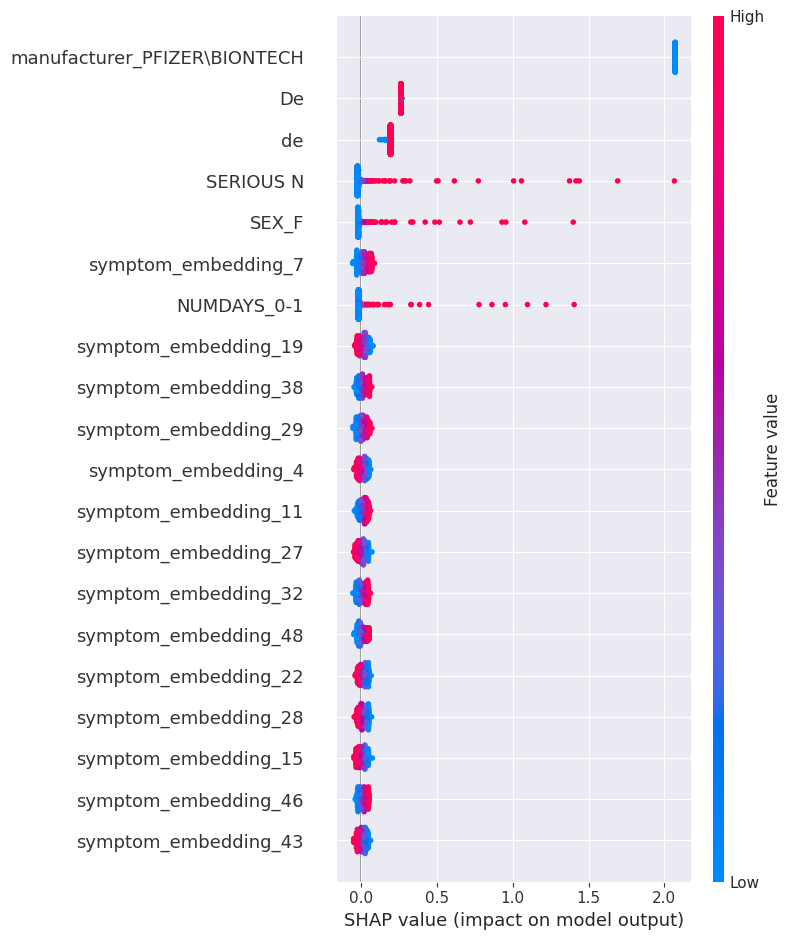

In [296]:
masker = shap.maskers.Independent(X_train_5)
# Initialize the LinearExplainer with the masker
ex = shap.LinearExplainer(logreg_5, masker)

shap_values = ex.shap_values(X_test_5)
shap.summary_plot(shap_values, X_test_5)

#### 10% true labels

In [138]:
with open('../Machine_Learning/Models/Logistic Regression_model_10.pkl', 'rb') as f:
    logreg_10 = pickle.load(f)
X_train_10 = pd.read_csv('data/X_train_unique_10_shuffled.csv')
X_test_10 = pd.read_csv('data/X_test_unique_10_shuffled.csv')

In [139]:
# Fits the explainer
background = X_test_10
# background = X_test
explainer = shap.Explainer(model=logreg_10.predict, masker=background, feature_names=X_test_10.columns, seed=0)
# Calculates the SHAP values - It takes some time
shap_values = explainer(background)  # , max_evals=1000

In [140]:
shap_values_logreg_10 = pd.DataFrame(data=shap_values.values, columns=X_test_10.columns)
# shap_values_logreg_10.mul(1000)
shap_values_logreg_10.head()

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0.0,0.0,0.00,0.0025,0.0,0.0000,0.0,0.0,0.0,0.0,...,0.0000,-0.0025,0.0125,0.0025,-0.0025,0.0,0.0025,0.0,0.0000,-0.0100
1,0.0,0.0,0.02,0.0000,0.0,0.0025,0.0,0.0,0.0,0.0,...,0.0025,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000
2,0.0,0.0,0.00,0.0000,0.0,-0.0025,0.0,0.0,0.0,0.0,...,0.0000,0.0000,-0.0050,0.0000,0.0025,0.0,-0.0025,0.0,0.0000,0.0000
3,0.0,0.0,0.00,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,-0.0050,0.0000,0.0,0.0000,0.0,-0.0025,0.0000
4,0.0,0.0,0.00,-0.0025,0.0,0.0000,0.0,0.0,0.0,0.0,...,0.0000,0.0000,-0.0025,-0.0025,0.0000,0.0,0.0000,0.0,0.0000,-0.0025


In [141]:
symptom_cols = []

for col in shap_values_logreg_10.columns:
    if 'symptom_embedding_' in col:
        symptom_cols.append(col)
        
vaccine_cols = []

for col in shap_values_logreg_10.columns:
    if 'manufacturer_' in col:
        vaccine_cols.append(col)

In [142]:
shap_values_logreg_10_fl = pd.DataFrame()

shap_values_logreg_10_fl['vaccine'] = shap_values_logreg_10[vaccine_cols].sum(axis=1)
shap_values_logreg_10_fl['symptom'] = shap_values_logreg_10[symptom_cols].sum(axis=1)
shap_values_logreg_10_fl['age_group'] = shap_values_logreg_10[age_cols].sum(axis=1)
shap_values_logreg_10_fl['sex'] = shap_values_logreg_10[sex_cols].sum(axis=1)
shap_values_logreg_10_fl['serious'] = shap_values_logreg_10[serious_cols].sum(axis=1)
shap_values_logreg_10_fl['seriousness'] = shap_values_logreg_10[reaction_cols].sum(axis=1)
shap_values_logreg_10_fl['numdays'] = shap_values_logreg_10[numdays_cols].sum(axis=1)
shap_values_logreg_10_fl['ct'] = shap_values_logreg_10[de_cols].sum(axis=1)

shap_values_logreg_10_fl.head()

,vaccine,symptom,age_group,sex,serious,seriousness,numdays,ct
0,0.0,-0.0525,0.0025,0.0050,0.0075,-0.0075,-0.0150,0.0000
1,0.0,-0.0175,0.0225,0.4650,0.4675,0.0025,0.0000,0.0000
2,0.0,-0.0075,-0.0025,-0.0150,-0.0125,-0.0100,-0.0125,0.0000
3,0.0,-0.0100,0.0000,-0.0175,-0.0175,-0.0100,-0.0050,0.0000
4,0.0,-0.0100,-0.0025,-0.0150,-0.0150,-0.0075,-0.0125,0.0025


In [143]:
shap_values_logreg_10_fl.abs().mean(axis=0).mul(100)

vaccine        0.000000
symptom        1.551786
age_group      0.613393
sex            2.689286
serious        3.190179
seriousness    1.608929
numdays        2.441964
ct             0.088393
dtype: float64

In [144]:
#---------------

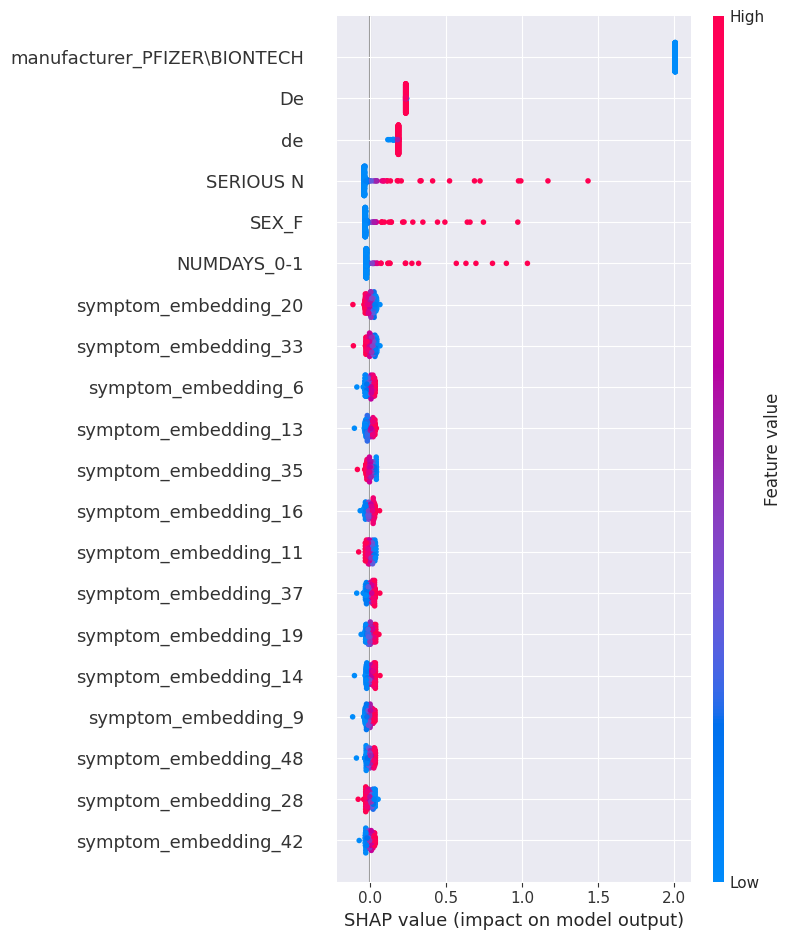

In [75]:
masker = shap.maskers.Independent(X_train_10)
# Initialize the LinearExplainer with the masker
ex = shap.LinearExplainer(logreg_10, masker)

shap_values = ex.shap_values(X_test_10)
shap.summary_plot(shap_values, X_test_10)

### K-Nearest Neighbors

#### all data

In [145]:
with open('../Machine_Learning/Models/K-Nearest Neighbors_model_all.pkl', 'rb') as f:
    knn_all = pickle.load(f)
X_test_all = pd.read_csv('data/X_test_shuffled_all.csv')
y_test_all = pd.read_csv('data/y_test_shuffled_all.csv')

In [146]:
# Fits the explainer
background = X_test_all
# background = X_test
explainer = shap.Explainer(model=knn_all.predict, masker=background, feature_names=X_test_all.columns, seed=0)
# Calculates the SHAP values - It takes some time
shap_values = explainer(background)  # , max_evals=1000

PermutationExplainer explainer: 283it [03:25,  1.31it/s]                         


In [147]:
shap_values_knn_all = pd.DataFrame(data=shap_values.values, columns=X_test_all.columns)
# shap_values_knn_all.mul(1000)
shap_values_knn_all

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,-0.0025,0.0,-0.0025,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
280,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
symptom_cols = []

for col in shap_values_knn_all.columns:
    if 'symptom_embedding_' in col:
        symptom_cols.append(col)

vaccine_cols = []

for col in shap_values_knn_all.columns:
    if 'manufacturer_' in col in col:
        vaccine_cols.append(col)
        
age_cols = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109',
            '110-119']
numdays_cols = ['NUMDAYS_0-1', 'NUMDAYS_2-3', 'NUMDAYS_4-5', 'NUMDAYS_6-7', 'NUMDAYS_8-9', 'NUMDAYS_10-11',
                'NUMDAYS_12-13', 'NUMDAYS_14+']
reaction_cols = ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']
de_cols = ['DE', 'De', 'dE', 'de']
serious_cols = ['SERIOUS Y', 'SERIOUS N']
sex_cols = ['SEX_M', 'SEX_F', 'SEX_U']



In [149]:
shap_values_knn_all_fl = pd.DataFrame()

shap_values_knn_all_fl['vaccine'] = shap_values_knn_all[vaccine_cols].sum(axis=1)
shap_values_knn_all_fl['symptom'] = shap_values_knn_all[symptom_cols].sum(axis=1)
shap_values_knn_all_fl['age_group'] = shap_values_knn_all[age_cols].sum(axis=1)
shap_values_knn_all_fl['sex'] = shap_values_knn_all[sex_cols].sum(axis=1)
shap_values_knn_all_fl['serious'] = shap_values_knn_all[serious_cols].sum(axis=1)
shap_values_knn_all_fl['seriousness'] = shap_values_knn_all[reaction_cols].sum(axis=1)
shap_values_knn_all_fl['numdays'] = shap_values_knn_all[numdays_cols].sum(axis=1)
shap_values_knn_all_fl['ct'] = shap_values_knn_all[de_cols].sum(axis=1)

shap_values_knn_all_fl

,vaccine,symptom,age_group,sex,serious,seriousness,numdays,ct
0,0.0,0.0,0.000,-7.500000e-03,0.0000,0.0000,0.0,-0.0625
1,0.0,0.0,0.000,0.000000e+00,-0.0050,0.0000,0.0,-0.0650
2,0.0,0.0,0.000,-2.500000e-03,-0.0025,0.0000,0.0,-0.0650
3,0.0,0.0,-0.005,-2.500000e-03,-0.0025,0.0025,0.0,-0.0625
4,0.0,0.0,0.000,0.000000e+00,-0.0050,0.0000,0.0,0.9350
...,...,...,...,...,...,...,...,...
277,0.0,0.0,0.000,-2.500000e-03,-0.0075,0.0000,0.0,-0.0600
278,0.0,0.0,0.000,2.500000e-03,-0.0025,0.0000,0.0,-0.0700
279,0.0,0.0,0.000,-3.469447e-18,0.0000,-0.0025,0.0,-0.0675
280,0.0,0.0,0.000,0.000000e+00,-0.0025,0.0000,0.0,-0.0675


In [150]:
shap_values_knn_all_fl.abs().mean(axis=0).mul(100)

vaccine         0.000000
symptom         0.000000
age_group       0.049645
sex             0.374113
serious         0.572695
seriousness     0.050532
numdays         0.093085
ct             13.991135
dtype: float64

#### 5% true labels

In [151]:
with open('../Machine_Learning/Models/K-Nearest Neighbors_model_5.pkl', 'rb') as f:
    KNN_5 = pickle.load(f)
    
X_train_5 = pd.read_csv('data/X_train_unique_5_shuffled.csv')
X_test_5 = pd.read_csv('data/X_test_unique_5_shuffled.csv')

In [152]:
X_test_5

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000063,0.000000,0.000000,0.000000,...,0.032946,0.032091,0.045823,-0.006037,0.019346,-0.027501,-0.007555,0.010331,0.043286,-0.009257
1,0.000000,0.000377,0.002639,0.004461,0.002639,0.001445,0.001005,0.000189,0.000189,0.000000,...,-0.003122,0.014283,-0.009054,0.030451,0.020530,-0.004036,-0.009055,0.018825,0.026272,-0.031567
2,0.000000,0.000000,0.000000,0.000189,0.000000,0.000566,0.000189,0.000189,0.000063,0.000000,...,0.028097,0.024435,0.007179,0.000228,0.004108,-0.004898,-0.035987,0.047153,0.046459,0.045437
3,0.000000,0.000000,0.000000,0.000126,0.000000,0.000000,0.000063,0.000063,0.000000,0.000000,...,-0.023030,0.011413,0.015250,0.018079,0.011128,-0.000364,0.037997,-0.010287,0.001667,0.011803
4,0.000000,0.000000,0.000063,0.000063,0.000314,0.000063,0.000063,0.000126,0.000000,0.000000,...,0.005062,-0.008273,0.033750,-0.039425,0.038967,-0.008725,0.045750,0.011778,-0.044742,0.044148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.000000,0.000000,0.000000,0.000063,0.000063,0.000063,0.000063,0.000063,0.000000,0.000000,...,-0.026966,-0.032755,0.007869,-0.013987,-0.036177,0.037844,-0.018195,-0.006673,-0.029474,0.014972
556,0.000063,0.002702,0.024568,0.042664,0.043607,0.042413,0.020170,0.004901,0.000691,0.000063,...,0.039513,-0.042837,-0.049709,-0.039103,0.024364,0.028264,-0.015928,0.001121,-0.008298,0.004273
557,0.000000,0.000000,0.000000,0.000000,0.000126,0.000189,0.000063,0.000126,0.000000,0.000000,...,-0.036670,-0.032177,0.005978,0.043500,0.008673,-0.031770,0.030728,-0.027193,-0.034798,-0.036403
558,0.000000,0.000000,0.000063,0.000063,0.000189,0.000063,0.000063,0.000000,0.000000,0.000000,...,0.000402,-0.041508,0.025174,0.010487,0.025288,0.030058,0.034490,0.030905,0.009920,-0.026193


In [153]:
# Fits the explainer
background = X_test_5
# background = X_test
explainer = shap.Explainer(model=KNN_5.predict, masker=background, feature_names=X_test_5.columns, seed=0)
# Calculates the SHAP values - It takes some time
shap_values = explainer(background)  # , max_evals=1000

PermutationExplainer explainer: 561it [06:29,  1.41it/s]                         


In [154]:
shap_values_knn_5 = pd.DataFrame(data=shap_values.values, columns=X_test_5.columns)
# shap_values_knn_5.mul(1000)
shap_values_knn_5

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,-0.0050,0.0025,0.0000,0.0000,0.0025,-0.0025,0.0050,-0.0025
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0025,0.0000,0.0000,-0.0025,-0.0025,0.0000,0.0025,-0.0025
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0025,0.0075,0.0025,0.0000,0.0300,-0.0025,-0.0025,0.0100,0.0050
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0025,0.0000,0.0000,0.0025,0.0025,-0.0025,0.0000,-0.0025,0.0025,0.0000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0025,-0.0025,0.0000,0.0025,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0025,0.0000,0.0000,0.0025,0.0000,0.0000,0.0000,0.0000,0.0000
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0025,0.0000,0.0000,0.0000,0.0000,0.0025,0.0000,0.0000
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,-0.0050,0.0000,-0.0075,0.0025,-0.0025,0.0025,0.0000,0.0000,-0.0025
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0025,0.0025,0.0025,0.0000,0.0000,0.0000


In [155]:
symptom_cols = []

for col in shap_values_knn_5.columns:
    if 'symptom_embedding_' in col:
        symptom_cols.append(col)

vaccine_cols = []

for col in shap_values_knn_5.columns:
    if 'manufacturer_' in col:
        vaccine_cols.append(col)
age_cols = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109',
            '110-119']
numdays_cols = ['NUMDAYS_0-1', 'NUMDAYS_2-3', 'NUMDAYS_4-5', 'NUMDAYS_6-7', 'NUMDAYS_8-9', 'NUMDAYS_10-11',
                'NUMDAYS_12-13', 'NUMDAYS_14+']
reaction_cols = ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']
de_cols = ['DE', 'De', 'dE', 'de']
serious_cols = ['SERIOUS Y', 'SERIOUS N']
sex_cols = ['SEX_M', 'SEX_F', 'SEX_U']

In [156]:
shap_values_knn_5

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,-0.0050,0.0025,0.0000,0.0000,0.0025,-0.0025,0.0050,-0.0025
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0025,0.0000,0.0000,-0.0025,-0.0025,0.0000,0.0025,-0.0025
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0025,0.0075,0.0025,0.0000,0.0300,-0.0025,-0.0025,0.0100,0.0050
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0025,0.0000,0.0000,0.0025,0.0025,-0.0025,0.0000,-0.0025,0.0025,0.0000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0025,-0.0025,0.0000,0.0025,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0025,0.0000,0.0000,0.0025,0.0000,0.0000,0.0000,0.0000,0.0000
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0025,0.0000,0.0000,0.0000,0.0000,0.0025,0.0000,0.0000
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,-0.0050,0.0000,-0.0075,0.0025,-0.0025,0.0025,0.0000,0.0000,-0.0025
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0025,0.0025,0.0025,0.0000,0.0000,0.0000


In [157]:
shap_values_knn_5_fl = pd.DataFrame()

shap_values_knn_5_fl['vaccine'] = shap_values_knn_5[vaccine_cols].sum(axis=1)
shap_values_knn_5_fl['symptom'] = shap_values_knn_5[symptom_cols].sum(axis=1)
shap_values_knn_5_fl['age_group'] = shap_values_knn_5[age_cols].sum(axis=1)
shap_values_knn_5_fl['sex'] = shap_values_knn_5[sex_cols].sum(axis=1)
shap_values_knn_5_fl['serious'] = shap_values_knn_5[serious_cols].sum(axis=1)
shap_values_knn_5_fl['seriousness'] = shap_values_knn_5[reaction_cols].sum(axis=1)
shap_values_knn_5_fl['numdays'] = shap_values_knn_5[numdays_cols].sum(axis=1)
shap_values_knn_5_fl['ct'] = shap_values_knn_5[de_cols].sum(axis=1)

shap_values_knn_5_fl.head()

,vaccine,symptom,age_group,sex,serious,seriousness,numdays,ct
0,0.0,0.010,0.0,0.0,0.0,0.0,-0.0025,0.0025
1,0.0,0.010,0.0,0.0,0.0,0.0,0.0000,0.0000
2,0.0,0.005,0.0,0.0,0.0,0.0,0.0000,0.0050
3,0.0,0.010,0.0,0.0,0.0,0.0,0.0000,0.0000
4,0.0,0.010,0.0,0.0,0.0,0.0,0.0000,0.0000


In [158]:
shap_values_knn_5_fl.abs().mean(axis=0).mul(100)

vaccine        0.000000
symptom        5.902232
age_group      0.005804
sex            0.018304
serious        0.035268
seriousness    0.005357
numdays        0.011161
ct             0.120089
dtype: float64

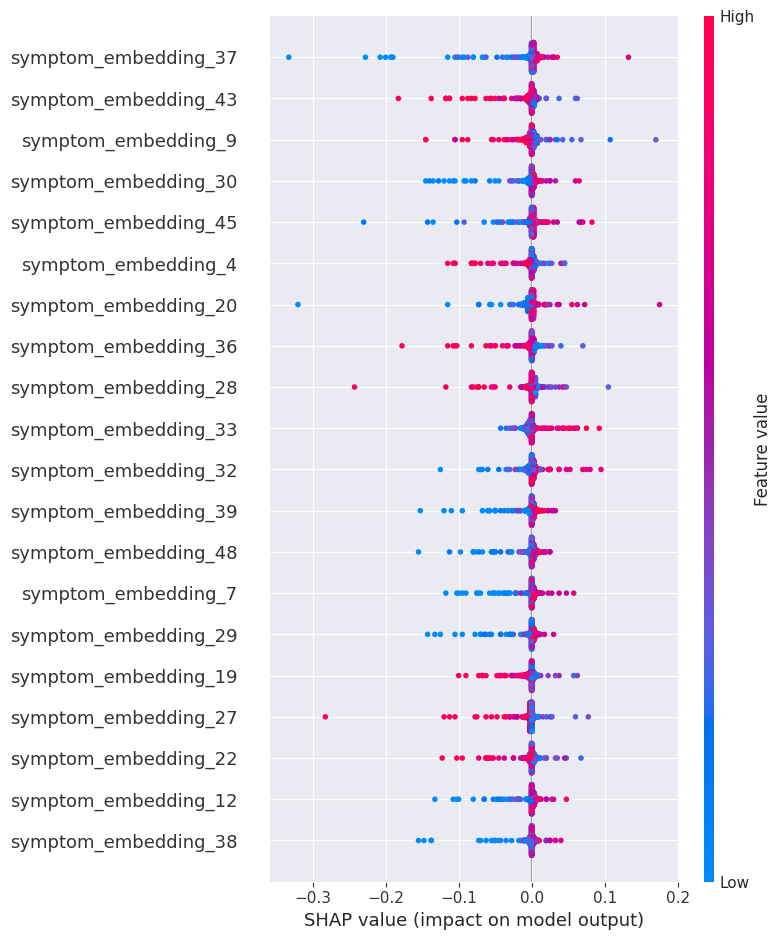

In [87]:
shap.summary_plot(shap_values, X_test_5)

#### 10% true labels

In [159]:
with open('../Machine_Learning/Models/K-Nearest Neighbors_model_10.pkl', 'rb') as f:
    KNN_10 = pickle.load(f)
    
X_train_10 = pd.read_csv('data/X_train_unique_10_shuffled.csv')
X_test_10 = pd.read_csv('data/X_test_unique_10_shuffled.csv')

In [160]:
# Fits the explainer
background = X_test_10
# background = X_test
explainer = shap.Explainer(model=KNN_10.predict, masker=background, feature_names=X_test_10.columns, seed=0)
# Calculates the SHAP values - It takes some time
shap_values = explainer(background)  # , max_evals=1000

PermutationExplainer explainer: 281it [03:10,  1.40it/s]                         


In [161]:
shap_values_knn_10 = pd.DataFrame(data=shap_values.values, columns=X_test_10.columns)
# shap_values_knn_10.mul(1000)
shap_values_knn_10

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0100,0.0025,0.0025,0.0025,0.0050,-0.0025,0.0000,0.0000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0025,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0025,-0.0050,0.0000,0.0000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0025,0.0000,0.0050,0.0075,0.0025,-0.0025,0.0000,0.0000,0.0000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0075,-0.0025,0.0000,-0.0025,-0.0025,0.0000,0.0000,0.0000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0025,0.0000,0.0000,0.0000,-0.0025,0.0000,0.0025,0.0025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0025,0.0025,0.0075,0.0000,-0.0025,-0.0025,0.0000,0.0000,0.0000,0.0025
276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0050,0.0000,0.0025,0.0075,0.0000,0.0000,-0.0050,0.0000
277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0025,-0.0050,0.0050,0.0000,0.0025,0.0000,0.0000,-0.0025
278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0050,0.0025,0.0000,0.0025,0.0000,-0.0025,-0.0025,0.0000,0.0000


In [162]:
symptom_cols = []

for col in shap_values_knn_10.columns:
    if 'symptom_embedding_' in col:
        symptom_cols.append(col)

vaccine_cols = []

for col in shap_values_knn_10.columns:
    if 'manufacturer_' in col:
        vaccine_cols.append(col)
age_cols = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109',
            '110-119']
numdays_cols = ['NUMDAYS_0-1', 'NUMDAYS_2-3', 'NUMDAYS_4-5', 'NUMDAYS_6-7', 'NUMDAYS_8-9', 'NUMDAYS_10-11',
                'NUMDAYS_12-13', 'NUMDAYS_14+']
reaction_cols = ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']
de_cols = ['DE', 'De', 'dE', 'de']
serious_cols = ['SERIOUS Y', 'SERIOUS N']
sex_cols = ['SEX_M', 'SEX_F', 'SEX_U']

In [163]:
shap_values_knn_10_fl = pd.DataFrame()

shap_values_knn_10_fl['vaccine'] = shap_values_knn_10[vaccine_cols].sum(axis=1)
shap_values_knn_10_fl['symptom'] = shap_values_knn_10[symptom_cols].sum(axis=1)
shap_values_knn_10_fl['age_group'] = shap_values_knn_10[age_cols].sum(axis=1)
shap_values_knn_10_fl['sex'] = shap_values_knn_10[sex_cols].sum(axis=1)
shap_values_knn_10_fl['serious'] = shap_values_knn_10[serious_cols].sum(axis=1)
shap_values_knn_10_fl['seriousness'] = shap_values_knn_10[reaction_cols].sum(axis=1)
shap_values_knn_10_fl['numdays'] = shap_values_knn_10[numdays_cols].sum(axis=1)
shap_values_knn_10_fl['ct'] = shap_values_knn_10[de_cols].sum(axis=1)

shap_values_knn_10_fl.head()

,vaccine,symptom,age_group,sex,serious,seriousness,numdays,ct
0,0.0,0.0425,0.0,0.000,0.0000,0.0,-0.0025,0.000
1,0.0,0.0225,0.0,0.005,0.0150,0.0,0.0025,-0.005
2,0.0,0.0400,0.0,0.000,0.0000,0.0,0.0000,0.000
3,0.0,0.0375,0.0,0.000,-0.0025,0.0,0.0000,0.005
4,0.0,0.0400,0.0,0.000,-0.0025,0.0,-0.0025,0.005


In [164]:
shap_values_knn_10_fl.abs().mean(axis=0).mul(100)

vaccine        0.000000
symptom        6.597321
age_group      0.023214
sex            0.112500
serious        0.074107
seriousness    0.021429
numdays        0.047321
ct             0.247321
dtype: float64

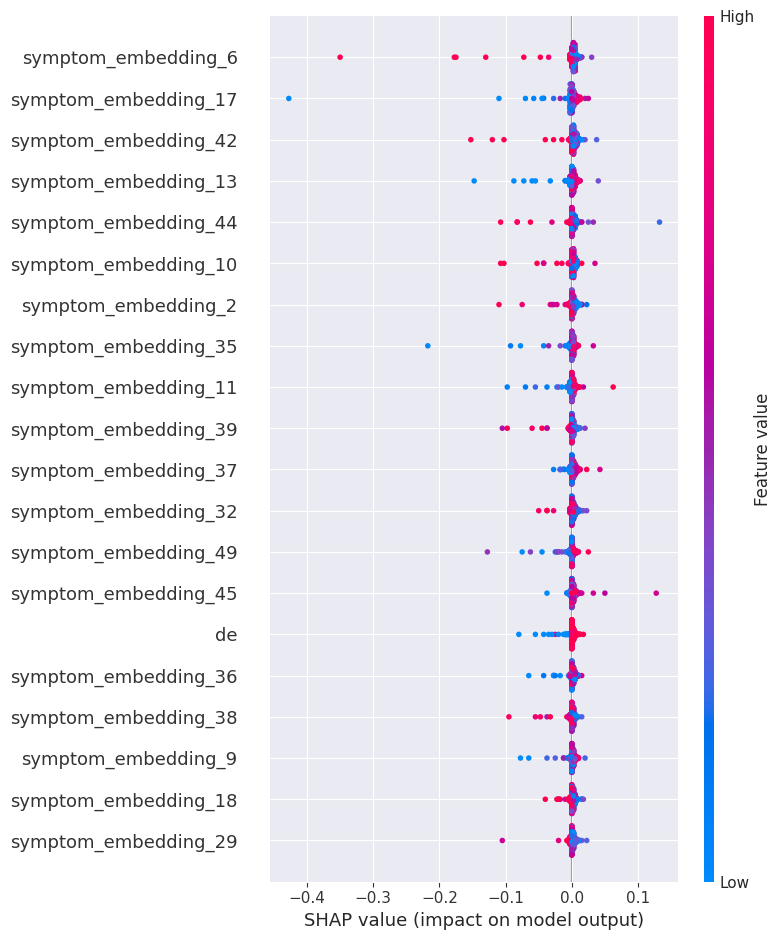

In [165]:
shap.summary_plot(shap_values, X_test_10)

### Naive Bayes

#### all data

In [166]:
with open('../Machine_Learning/Models/Naive Bayes_model_all.pkl', 'rb') as f:
    Naive_Bayes_all = pickle.load(f)
X_test_all = pd.read_csv('data/X_test_shuffled_all.csv')
y_test_all = pd.read_csv('data/y_test_shuffled_all.csv')

In [167]:
# Fits the explainer
background = X_test_all
# background = X_test
explainer = shap.Explainer(model=Naive_Bayes_all.predict, masker=background, feature_names=X_test_all.columns, seed=0)
# Calculates the SHAP values - It takes some time
shap_values = explainer(background)  # , max_evals=1000

PermutationExplainer explainer: 283it [00:16,  6.93it/s]                         


In [168]:
shap_values_nb_all = pd.DataFrame(data=shap_values.values, columns=X_test_all.columns)
# shap_values_nb_5.mul(1000)
shap_values_nb_all

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0.0000,0.0,-0.0200,-0.0075,0.0000,-0.0025,-0.0025,0.0000,-0.0025,-0.0025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0000,0.0,-0.0100,-0.0150,0.0000,0.0000,-0.0050,-0.0025,-0.0025,-0.0025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0000,0.0,-0.0100,-0.0025,-0.0025,-0.0150,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.0050,0.0,0.0000,-0.0050,-0.0050,-0.0075,-0.0100,-0.0050,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0000,0.0,-0.0025,-0.0050,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0.0000,0.0,-0.0050,-0.0075,-0.0050,-0.0050,0.0000,-0.0025,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278,-0.0050,0.0,0.0000,-0.0100,-0.0100,-0.0050,-0.0025,0.0000,-0.0025,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279,0.0000,0.0,-0.0100,-0.0100,-0.0025,0.0000,0.0000,-0.0025,-0.0050,-0.0025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
280,-0.0025,0.0,-0.0100,0.0000,-0.0050,-0.0075,-0.0050,0.0000,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
symptom_cols = []

for col in shap_values_nb_all.columns:
    if 'symptom_embedding_' in col:
        symptom_cols.append(col)
        
vaccine_cols = []

for col in shap_values_nb_all.columns:
    if 'manufacturer_' in col:
        vaccine_cols.append(col)

In [170]:
age_cols = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119']
numdays_cols = ['NUMDAYS_0-1', 'NUMDAYS_2-3', 'NUMDAYS_4-5', 'NUMDAYS_6-7', 'NUMDAYS_8-9', 'NUMDAYS_10-11',
               'NUMDAYS_12-13', 'NUMDAYS_14+']
reaction_cols = ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']
de_cols = ['DE', 'De', 'dE', 'de']
serious_cols = ['SERIOUS Y', 'SERIOUS N']
sex_cols = ['SEX_M', 'SEX_F', 'SEX_U']

In [171]:
shap_values_nb_all_fl = pd.DataFrame()

shap_values_nb_all_fl['vaccine'] = shap_values_nb_all[vaccine_cols].sum(axis=1)
shap_values_nb_all_fl['symptom'] = shap_values_nb_all[symptom_cols].sum(axis=1)
shap_values_nb_all_fl['age_group'] = shap_values_nb_all[age_cols].sum(axis=1)
shap_values_nb_all_fl['sex'] = shap_values_nb_all[sex_cols].sum(axis=1)
shap_values_nb_all_fl['serious'] = shap_values_nb_all[serious_cols].sum(axis=1)
shap_values_nb_all_fl['seriousness'] = shap_values_nb_all[reaction_cols].sum(axis=1)
shap_values_nb_all_fl['numdays'] = shap_values_nb_all[numdays_cols].sum(axis=1)
shap_values_nb_all_fl['ct'] = shap_values_nb_all[de_cols].sum(axis=1)

shap_values_nb_all_fl.head()

,vaccine,symptom,age_group,sex,serious,seriousness,numdays,ct
0,0.0,0.0,-0.0375,-0.0125,-0.0025,-0.0075,-0.0200,-0.010
1,0.0,0.0,-0.0375,-0.0050,-0.0075,-0.0075,-0.0175,-0.015
2,0.0,0.0,-0.0300,-0.0025,-0.0075,-0.0050,-0.0250,-0.020
3,0.0,0.0,-0.0375,0.0000,-0.0025,-0.0050,-0.0250,-0.020
4,0.0,0.0,-0.0075,0.0000,0.0000,-0.0075,-0.0050,0.930


In [172]:
shap_values_nb_all_fl.abs().mean(axis=0).mul(100)

vaccine        0.000000
symptom        0.000887
age_group      5.484929
sex            1.023936
serious        1.033688
seriousness    1.176418
numdays        4.785461
ct             4.705674
dtype: float64

#### 5% true labels

In [173]:
with open('../Machine_Learning/Models/Naive Bayes_model_5.pkl', 'rb') as f:
    Naive_Bayes_5 = pickle.load(f)
    
X_train_5 = pd.read_csv('data/X_train_unique_5_shuffled.csv')
X_test_5 = pd.read_csv('data/X_test_unique_5_shuffled.csv')

In [174]:
# Fits the explainer
background = X_test_5
# background = X_test
explainer = shap.Explainer(model=Naive_Bayes_5.predict, masker=background, feature_names=X_test_5.columns, seed=0)
# Calculates the SHAP values - It takes some time
shap_values = explainer(background)  # , max_evals=1000

PermutationExplainer explainer: 561it [00:30, 12.63it/s]                         


In [175]:
shap_values_nb_5 = pd.DataFrame(data=shap_values.values, columns=X_test_5.columns)
# shap_values_nb_5.mul(1000)
shap_values_nb_5

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0025,0.0000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0025,0.005,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0000,0.000,0.0025,0.0000,-0.0025,-0.0025,0.0025,0.0025,0.0000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0025,0.0,0.0,...,0.0000,0.000,0.0000,-0.0025,0.0000,0.0025,0.0000,-0.0025,0.0000,0.0
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0000,0.000,0.0025,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0000,0.000,0.0000,-0.0050,0.0000,0.0000,0.0050,0.0000,-0.0025,0.0
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0025,0.0


In [176]:
symptom_cols = []

for col in shap_values_nb_5.columns:
    if 'symptom_embedding_' in col:
        symptom_cols.append(col)
        
vaccine_cols = []

for col in shap_values_nb_5.columns:
    if 'manufacturer_' in col:
        vaccine_cols.append(col)

In [177]:
age_cols = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119']
numdays_cols = ['NUMDAYS_0-1', 'NUMDAYS_2-3', 'NUMDAYS_4-5', 'NUMDAYS_6-7', 'NUMDAYS_8-9', 'NUMDAYS_10-11',
               'NUMDAYS_12-13', 'NUMDAYS_14+']
reaction_cols = ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']
de_cols = ['DE', 'De', 'dE', 'de']
serious_cols = ['SERIOUS Y', 'SERIOUS N']
sex_cols = ['SEX_M', 'SEX_F', 'SEX_U']

In [178]:
shap_values_nb_5_fl = pd.DataFrame()

shap_values_nb_5_fl['vaccine'] = shap_values_nb_5[vaccine_cols].sum(axis=1)
shap_values_nb_5_fl['symptom'] = shap_values_nb_5[symptom_cols].sum(axis=1)
shap_values_nb_5_fl['age_group'] = shap_values_nb_5[age_cols].sum(axis=1)
shap_values_nb_5_fl['sex'] = shap_values_nb_5[sex_cols].sum(axis=1)
shap_values_nb_5_fl['serious'] = shap_values_nb_5[serious_cols].sum(axis=1)
shap_values_nb_5_fl['seriousness'] = shap_values_nb_5[reaction_cols].sum(axis=1)
shap_values_nb_5_fl['numdays'] = shap_values_nb_5[numdays_cols].sum(axis=1)
shap_values_nb_5_fl['ct'] = shap_values_nb_5[de_cols].sum(axis=1)

shap_values_nb_5_fl.head()

,vaccine,symptom,age_group,sex,serious,seriousness,numdays,ct
0,0.0,0.0125,0.0,0.0,0.0,-0.0025,0.0,0.0000
1,0.0,0.0075,0.0,0.0,0.0,0.0000,0.0,0.0025
2,0.0,0.0100,0.0,0.0,0.0,0.0000,0.0,0.0000
3,0.0,0.0100,0.0,0.0,0.0,0.0000,0.0,0.0000
4,0.0,0.0100,0.0,0.0,0.0,0.0000,0.0,0.0000


In [179]:
shap_values_nb_5_fl.abs().mean(axis=0).mul(100)

vaccine        0.000000
symptom        3.443304
age_group      0.158929
sex            0.031250
serious        0.005804
seriousness    0.177679
numdays        0.035714
ct             0.123214
dtype: float64

In [47]:
shap.summary_plot(shap_values, X_test_5)

PermutationExplainer explainer:  41%|████▏     | 231/560 [00:24<01:00,  5.41it/s]


KeyboardInterrupt: 

#### 10% true labels

In [180]:
with open('../Machine_Learning/Models/Naive Bayes_model_10.pkl', 'rb') as f:
    Naive_Bayes_10 = pickle.load(f)
    
X_train_10 = pd.read_csv('../Machine_Learning/data/X_train_unique_10_shuffled.csv')
X_test_10 = pd.read_csv('../Machine_Learning/data/X_test_unique_10_shuffled.csv')

In [181]:
# Fits the explainer
background = X_test_10
# background = X_test
explainer = shap.Explainer(model=Naive_Bayes_10.predict, masker=background, feature_names=X_test_10.columns, seed=0)
# Calculates the SHAP values - It takes some time
shap_values = explainer(background)  # , max_evals=1000

PermutationExplainer explainer: 281it [00:15,  6.38it/s]                         


In [182]:
shap_values_nb_10 = pd.DataFrame(data=shap_values.values, columns=X_test_10.columns)
# shap_values_nb_10.mul(1000)
shap_values_nb_10

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0.0,0.0,0.0,0.0075,0.0025,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0025,0.0,0.0000
1,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000
2,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0050,0.0000,0.0050,0.0050,0.0025,0.0000,0.0000,0.0,0.0000
3,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0025,0.0000,0.0025,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000
4,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0075,0.0000,0.0000,0.0000,0.0000,0.0025,0.0000,0.0,-0.0025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0025,0.0000,0.0000,0.0000,-0.0025,0.0,0.0000
276,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0025,0.0000,0.0025,0.0000,0.0000,0.0,0.0000
277,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0025,0.0050,0.0000,0.0025,0.0025,0.0000,0.0025,0.0,-0.0025
278,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0025,0.0000,0.0025,0.0025,0.0000,0.0050,-0.0025,0.0000,0.0,0.0000


In [183]:
symptom_cols = []

for col in shap_values_nb_10.columns:
    if 'symptom_embedding_' in col:
        symptom_cols.append(col)

vaccine_cols = []

for col in shap_values_nb_10.columns:
    if 'manufacturer_' in col:
        vaccine_cols.append(col)
age_cols = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109',
            '110-119']
numdays_cols = ['NUMDAYS_0-1', 'NUMDAYS_2-3', 'NUMDAYS_4-5', 'NUMDAYS_6-7', 'NUMDAYS_8-9', 'NUMDAYS_10-11',
                'NUMDAYS_12-13', 'NUMDAYS_14+']
reaction_cols = ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']
de_cols = ['DE', 'De', 'dE', 'de']
serious_cols = ['SERIOUS Y', 'SERIOUS N']
sex_cols = ['SEX_M', 'SEX_F', 'SEX_U']


In [184]:
shap_values_nb_10_fl = pd.DataFrame()
shap_values_nb_10_fl['vaccine'] = shap_values_nb_10[vaccine_cols].sum(axis=1)
shap_values_nb_10_fl['symptom'] = shap_values_nb_10[symptom_cols].sum(axis=1)
shap_values_nb_10_fl['age_group'] = shap_values_nb_10[age_cols].sum(axis=1)
shap_values_nb_10_fl['sex'] = shap_values_nb_10[sex_cols].sum(axis=1)
shap_values_nb_10_fl['serious'] = shap_values_nb_10[serious_cols].sum(axis=1)
shap_values_nb_10_fl['seriousness'] = shap_values_nb_10[reaction_cols].sum(axis=1)
shap_values_nb_10_fl['numdays'] = shap_values_nb_10[numdays_cols].sum(axis=1)
shap_values_nb_10_fl['ct'] = shap_values_nb_10[de_cols].sum(axis=1)

shap_values_nb_10_fl.head()

,vaccine,symptom,age_group,sex,serious,seriousness,numdays,ct
0,0.0,0.0050,0.01,0.0075,0.0000,0.0,0.0000,0.0075
1,0.0,0.0000,0.00,0.0075,0.0075,0.0,0.0075,0.0075
2,0.0,0.0300,0.00,0.0000,0.0000,0.0,0.0000,0.0000
3,0.0,0.0325,0.00,-0.0025,0.0000,0.0,0.0000,0.0000
4,0.0,0.0300,0.00,0.0000,0.0000,0.0,0.0000,0.0000


In [185]:
shap_values_nb_10_fl.abs().mean(axis=0).mul(100)

vaccine        0.000000
symptom        5.596429
age_group      0.175893
sex            0.074107
serious        0.028571
seriousness    0.281250
numdays        0.164286
ct             0.177679
dtype: float64

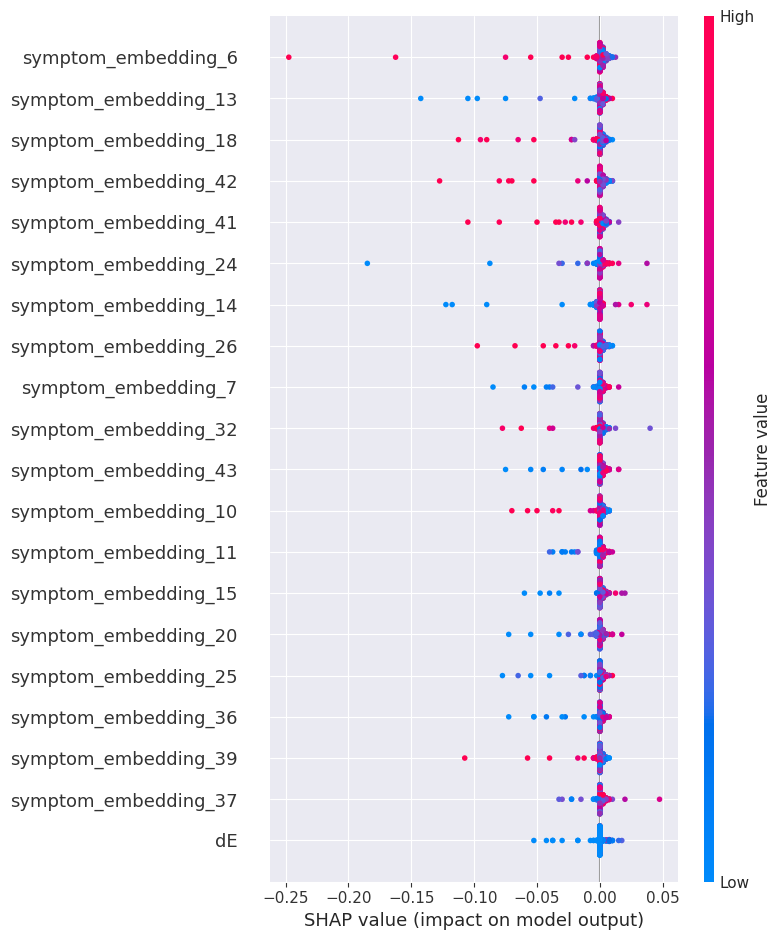

In [186]:
shap.summary_plot(shap_values, X_test_10)

In [118]:
shap_values

array([[ 0.     ,  0.     ,  0.00375, ...,  0.00125,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.00375,  0.     , ...,  0.     ,  0.     ,  0.015  ],
       ...,
       [ 0.     , -0.00125,  0.     , ...,  0.     ,  0.     ,  0.     ],
       [-0.00125, -0.00125,  0.     , ...,  0.     ,  0.00125,  0.     ],
       [ 0.     ,  0.     , -0.0025 , ...,  0.     ,  0.     ,  0.00125]])